In [181]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### 로지스틱 회귀(Logistic regression)<br>

- 로지스틱 회귀는 선형함수를 통과시켜 얻은 z를 임계 함수에 보내기 전에 변형시키는데, 바로 이런 함수를 활성화 함수(Activation function)라고 한다

- 활성화 함수를 통과한 값이 a로 표현되어 있는데 앞으로 a라고 하면 활성화 함수를 통과한 값이라고 이해하면 된다.

- 로지스틱 회귀는 마지막 단계에서 임계 함수(threshold fucntion)를 사용하여 예측을 수행합니다. 임계 함수는 아달린이나 퍼셉트론의 계단 함수와 역할은 비슷하지만 활성화 함수의 출력값을 사용한다는 점이 다르다.

- 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모형.
- 로지스틱 회귀의 예측 함수 정의.

<br>
\begin{equation}
\hat{y} = \sigma(b + w x) 
\end{equation}
\begin{equation}
\hat{y} = \sigma(b + w_1 x_1 + ... + w_p x_p), \; where  \; \sigma: Sigmoid fucntion
\end{equation}

<br>

#### 왜 활성화(Actiation) 함수는 비선형(Nonlinear) 함수를 사용하는가?<br>

- 두 식을 덧셈과 곱셈의 결합법칙과 분배법칙에 의하여 정리하면 다시 하나의 큰 선형 함수가 됨.

- 이렇게 되면 임계 함수 앞에 뉴런을 여러 개 쌓아도 결국 선형 함수일 것이므로 별 의미가 없다.

- 활성화 함수는 의무적으로 비선형 함수를 사용 --> 로지스틱 회귀의 활성화 함수는 '시그모이드(Sigmoid) 함수'

<br>

#### 시그모이드 함수(Sigmoid function)

$$s(z)=\frac{1}{1+e^{-z}} $$

- 출력값 z는 활성화 함수를 통과하여 a가 된다.

- 로지스틱 회귀에서 사용하는 활성화 함수인 시그모이드 함수는 z를 0 ~ 1 사이의 확률값으로 변환시켜주는 역활을 한다.

- 확률은 해석하기 나름이지만 보통 a가 0.5(50%)보다 크면 양성 클래스, 그 이하면 음성 클래스라고 구분.

- 시그모이드 함수는 오즈비(Odds ration)라는 통계를 기반으로 만들어지며, 오즈비에 로그를 취한 로짓 함수(Logit function)를 z라고 정리하면 이것을 로지스틱 함수라고 한다.

<br>

#### 로지스틱 손실 함수(Logistic loss fuction)
<br>

- 로지스틱 손실 함수는 다중 분류를 위한 손실 함수인 크로스 엔트로피(Cross entropy) 손실 함수를 이진 분류버전으로 만든 것.

- 실무에서는 종종 이진 분류와 다중 분류를 구분하지 않고, 모두 크로스 엔트로피 손실 함수라고 부르는 경우도 많음.

- 다중 분류와 이진 분류를 엄연히 구분하여 로지스틱 손실 함수라는 용어를 사용.

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}


#### Logistic parameter

* penalty : L1 혹은 L2 제약조건의 강도를 설정. <br><br>
     * l1 : 맨하튼 거리, 오차 = 오차 + alpha * (|w1| + |w2|) <br>
     * l2 : 유클리디안 거리의 제곱, 오차 = 오차 + alpha * (W1^2 + w2^2)
     * 가중치 규제 (특성 수 줄이기, 과대적합 방지) <br>
     * none 면 가중치 규제 미사용
<br><br>

- alpha : 높은 알파 값을 설정할 수록, 높은 제약조건을 설정하는 것. <br><br>

- C : cost function의 C를 의미하는 것이며, C의 경우에는 높은 C를 설정할 수록, 낮은 강도의 제약조건이 설정되고 낮은 C를 설정할 수록, 높은 강도의 제약조건이 설정됨.<br><br>

- class_weight :데이터에 직접 가중치를 설정하여 학습의 강도를 다르게 할 수 있는 하이퍼 파라미터. 
<br><br>
* solver  
    * liblinear : L1제약조건, L2제약조건 두 가지를 모두 지원하며, 이것은 작은 데이터에 적합한 알고리즘. <br>
    * sag, saga : 이것은 확률적 경사하강법을 기반으로 하기에 대용량 데이터에 적합한 알고리즘이며, sag는 L1 제약조건만을 지원하고, saga는 L1, L2 제약조건 둘 다 지원함.
<br><br>

- newton-cg, lbfgs (sag, saga) ==> 이것은 멀티클래스의 분류 모델에서 사용.
: 현재까지는 이 중에서 lbfgs 알고리즘이 가장 성능이 좋다고 알려져 있고, newton-cg, lbfgs 도 L2제약조건만 지원함.<br><br>

- Result : sag는 L1만 지원하고, newton-cg, saga, lbfgs 세 가지가 L2만 지원하고, liblinear, saga가 L1, L2 둘 다 지원

In [2]:
print( 2**3 )
print( 2**2 )
print( 2**-2)
print( 2**-3)

8
4
0.25
0.125


#### Sigmoid function

In [3]:
def sigmoid( z ):
    return 1 / ( 1+math.e**-z )

In [4]:
print( sigmoid( -10 ) )
print( sigmoid( -1 ) )
print( sigmoid( 0 ) )
print( sigmoid( 1 ) )
print( sigmoid( 10 ) )

4.539786870243442e-05
0.2689414213699951
0.5
0.7310585786300049
0.9999546021312976


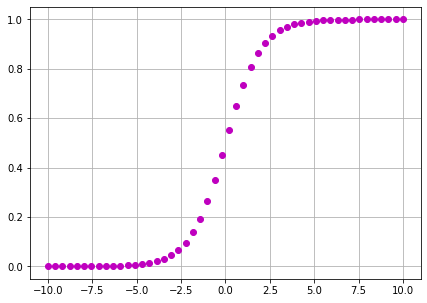

In [5]:
plt.figure( figsize=(7, 5) )
for z in np.linspace( -10, 10, 50 ):
    s = sigmoid( z )
    plt.plot( z, s,'mo')
plt.grid()
plt.show()

#### y가 수치형 데이터일 경우 회귀 학습

In [21]:
x = np.array( list( range( 1, 7, 1 ) ) )
y = np.array( list( range( 5, 16, 2 ) ) )  # y가 수치형 변수.

In [22]:
w             = 0
b             = 0
n             = len(x)
epochs        = 3000
learning_rate = 0.01

for i in range( epochs ):
    hy        = w*x + b                       # w=2, b=3
    cost      = np.sum( (hy - y)**2 ) / n
    gradientW = np.sum( ( w*x+b-y )*2*x ) / n
    gradientB = np.sum( ( w*x+b-y )*2   ) / n
    w         = w - learning_rate*gradientW
    b         = b - learning_rate*gradientB
    if i%100 == 0:
        print(f'epochs : { i }, cost : { round( cost, 3) }, w : { round( w, 3 ) }, b : { round( b, 3 ) }')
print( f'w={ round( w, 3 ) }' )
print( f'w={ round( b, 3 ) }' )

epochs : 0, cost : 111.667, w : 0.817, b : 0.2
epochs : 100, cost : 0.534, w : 2.388, b : 1.34
epochs : 200, cost : 0.257, w : 2.269, b : 1.848
epochs : 300, cost : 0.124, w : 2.187, b : 2.201
epochs : 400, cost : 0.06, w : 2.129, b : 2.446
epochs : 500, cost : 0.029, w : 2.09, b : 2.615
epochs : 600, cost : 0.014, w : 2.062, b : 2.733
epochs : 700, cost : 0.007, w : 2.043, b : 2.815
epochs : 800, cost : 0.003, w : 2.03, b : 2.872
epochs : 900, cost : 0.002, w : 2.021, b : 2.911
epochs : 1000, cost : 0.001, w : 2.014, b : 2.938
epochs : 1100, cost : 0.0, w : 2.01, b : 2.957
epochs : 1200, cost : 0.0, w : 2.007, b : 2.97
epochs : 1300, cost : 0.0, w : 2.005, b : 2.979
epochs : 1400, cost : 0.0, w : 2.003, b : 2.986
epochs : 1500, cost : 0.0, w : 2.002, b : 2.99
epochs : 1600, cost : 0.0, w : 2.002, b : 2.993
epochs : 1700, cost : 0.0, w : 2.001, b : 2.995
epochs : 1800, cost : 0.0, w : 2.001, b : 2.997
epochs : 1900, cost : 0.0, w : 2.001, b : 2.998
epochs : 2000, cost : 0.0, w : 2.0, b

####  y가 수치형으로 보는 기존 cost 함수를 이용한  y가 범주형(이진) 데이터일 경우 회귀 학습

In [105]:
x = np.array( list( range( 1, 7, 1 ) ) )
y = np.array( [0, 0, 0, 1, 1 ,1] )       # y가 범주형(이진) 변수.

In [107]:
def cost( x, y, w ):
    n    = len( x )
    z    = w*x   
    hy   = sigmoid( z )                   # Activation function
    loss = np.sum( (hy - y)**2 ) / n 
    return loss

#### y가 수치형으로 보는 기존 cost로는 매끄럽지 않게 나오는 것을 볼 수 있음.

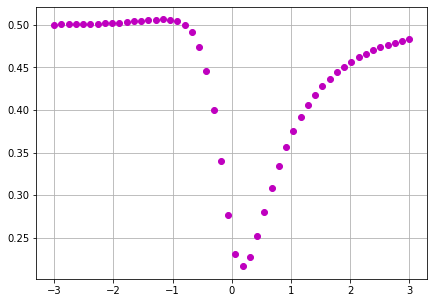

In [108]:
plt.figure( figsize=(7, 5) )
for w in np.linspace( -3, 3, 50 ):
    c = cost( x, y, w )
    plt.plot( w, c,'mo')
plt.grid()
plt.show()

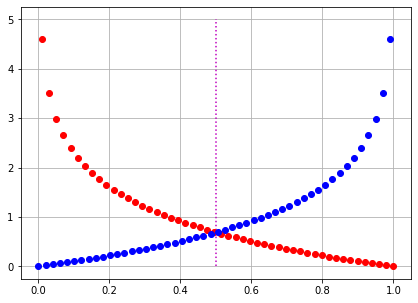

In [158]:
plt.figure( figsize=(7, 5) )
for x in np.linspace( 0.01, 1, 50 ):
    y1 = -np.log( x )
    plt.plot( x, y1, 'ro')
for x in np.linspace( 0, 0.99, 50 ):
    y2 = -np.log( 1 - x )
    plt.plot( x, y2, 'bo')
plt.vlines( 0.5, 0, 5, colors='m', linestyles= 'dotted')
plt.grid()
plt.show()

#### 위 cost함수를 오즈비, 로짓함수 개념을 통해 새로운 cost 함수로 변환해볼 필요가 있음.

In [95]:
def cost_B( x, y, w ):
    n    = len( x )
    z    = w*x   
    hy   = sigmoid( z ) 
    loss_i = y * -np.log( hy ) + ( 1 - y ) * -np.log( 1 - hy )    # Activation function
    loss = np.sum( loss_i ) / n 
    return loss

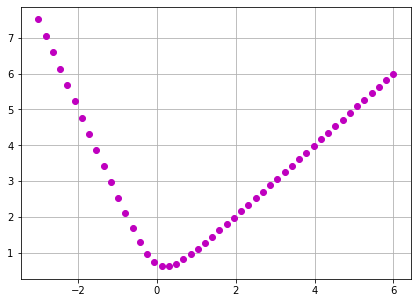

In [97]:
plt.figure( figsize=(7, 5) )
for w in np.linspace( -3, 6, 50 ):
    c = cost_B( x, y, w )
    plt.plot( w, c,'mo')
plt.grid()
plt.show()

#### 새로운 cost 함수를 이용한 y가 범주형(이진) 데이터일 경우 회귀 학습

In [106]:
w             = 0
b             = 0
n             = len(x)
epochs        = 3000
learning_rate = 0.01

for i in range( epochs ):
    z         = w*x + b
    hy        = sigmoid( z )            # w=2, b=3
    cost      = np.sum( (hy - y)**2 ) / n
    gradientW = np.sum( ( w*x+b-y )*2*x ) / n
    gradientB = np.sum( ( w*x+b-y )*2   ) / n
    w         = w - learning_rate*gradientW
    b         = b - learning_rate*gradientB
    if i%100 == 0:
        print(f'epochs : { i }, cost : { round( cost, 3) }, w : { round( w, 3 ) }, b : { round( b, 3 ) }')
print( f'w={ round( w, 3 ) }' )
print( f'w={ round( b, 3 ) }' )

epochs : 0, cost : 0.25, w : 0.05, b : 0.01
epochs : 100, cost : 0.209, w : 0.187, b : -0.098
epochs : 200, cost : 0.201, w : 0.208, b : -0.191
epochs : 300, cost : 0.196, w : 0.223, b : -0.255
epochs : 400, cost : 0.193, w : 0.234, b : -0.299
epochs : 500, cost : 0.19, w : 0.241, b : -0.33
epochs : 600, cost : 0.189, w : 0.246, b : -0.352
epochs : 700, cost : 0.188, w : 0.249, b : -0.366
epochs : 800, cost : 0.187, w : 0.252, b : -0.377
epochs : 900, cost : 0.186, w : 0.253, b : -0.384
epochs : 1000, cost : 0.186, w : 0.255, b : -0.389
epochs : 1100, cost : 0.186, w : 0.255, b : -0.392
epochs : 1200, cost : 0.185, w : 0.256, b : -0.395
epochs : 1300, cost : 0.185, w : 0.256, b : -0.396
epochs : 1400, cost : 0.185, w : 0.257, b : -0.397
epochs : 1500, cost : 0.185, w : 0.257, b : -0.398
epochs : 1600, cost : 0.185, w : 0.257, b : -0.399
epochs : 1700, cost : 0.185, w : 0.257, b : -0.399
epochs : 1800, cost : 0.185, w : 0.257, b : -0.399
epochs : 1900, cost : 0.185, w : 0.257, b : -0.4


#### 함수를 이용한 로지스틱 회귀 분석
- [ 공부한 시간, 출석 일수 ], [ 불합격, 합격 ]

In [66]:
x_data = np.array( [[1,3],[2,2],[3,1],[4,6],[5,5],[6,4]] )
y_data = np.array( [ 0, 0, 0, 1, 1, 1 ] )

In [67]:
model_logi = LogisticRegression()
model_logi.fit( x_data, y_data )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
model_logi.coef_, model_logi.intercept_

(array([[0.78341156, 0.78341156]]), array([-5.48382067]))

In [83]:
z = np.matmul( [ [6, 6] ], model_logi.coef_.reshape(-1, 1) ) + model_logi.intercept_.reshape(-1, 1)
1 - sigmoid( float(z) ),  sigmoid( float(z) )

(0.019510137645200154, 0.9804898623547998)

In [69]:
model_logi.predict_proba( [ [6, 6] ] )    # proba : sigmoid를 거쳤다는 의미.

array([[0.01951014, 0.98048986]])

In [79]:
model_logi.predict( [ [6, 6] ] )        # 0, 1 값으로 반환함. 즉 합불합 분류.

array([1])

In [88]:
model_logi.predict_proba( [ [6, 6] ] ).argmax( axis=1 )

array([1], dtype=int64)

In [146]:
model_logi.predict( [ [1,1], [6,5] ] )  

array([0, 1])

In [149]:
model_logi.predict_proba( [ [1,1], [6,5] ] ).argmax( axis=1 )

array([0, 1], dtype=int64)

In [144]:
model_logi.score( x_data, y_data )     # 정확도(Accuracy)

1.0

In [154]:
phat = model_logi.predict( x_data )
phat

array([0, 0, 0, 1, 1, 1])

In [155]:
phat == y_data

array([ True,  True,  True,  True,  True,  True])

In [156]:
(phat == y_data).mean()              #  model_logi.score( x_data, y_data ) ==> 정확도(Accuracy)

1.0

- 그러나 0,0,1,1,1,1,1,1,1,1,1,1  => 예측을 1,1,1,1,1,1,1,1,1,1 이었을 때 정확도를 80% 라고 보기 어렵다. 따라서 분류에서는 단순히 정확도를 가지고만 판단하지 않는다.

#### 연습문제 : Train, Test data set으로 나눈 후, 각각의 정확도를 구하시오. Test data set의 0 번째 행(row) 데이터로 당뇨병 유무를 확인하시오.

- 정보 1 : 과거 임신 횟수 (pregnant)
- 정보 2 : 포도당 부하 검사 2시간 후 공복 혈당 농도 (plasma)
- 정보 3 : 확장기 혈압 (pressure)
- 정보 4 : 삼두근 피부 주름 두께 (thickness)
- 정보 5 : 혈정 인슐린 (insulin)
- 정보 6 : 체질량 지수 (BMI)
- 정보 7 : 당뇨병 가족력 (pedigree)
- 정보 8 : 나이 (age)
- 클래스 : 당뇨( 1) , 당뇨가 아님 ( 0 )  (Outcome)

In [160]:
df = pd.read_csv('data5/pima-indians-diabetes.data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [232]:
x_data = df.iloc[:, :-1]
y_data = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.3, stratify=y_data )   # stratify : 0,1 균형있는 분배.

In [233]:
model_logi = make_pipeline( StandardScaler(),  LogisticRegression() )
model_logi.fit( x_train, y_train )
print(f'Accuracy of train data : { round(model_logi.score( x_train , y_train ), 3)*100 }%' )
print(f'Accuracy of test data  : { round(model_logi.score( x_test , y_test ), 3)*100 }%' )

Accuracy of train data : 78.4%
Accuracy of test data  : 74.9%


In [234]:
float( model_logi.predict( [x_test.iloc[0]] ) ), y_test.iloc[0]

(0.0, 0)